In [ ]:
!python --version

Python 3.10.12


In [21]:
import os
import sys
import re
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [22]:
sys.path.append('/content/drive/MyDrive/Colab Notebooks')

import TensorDeepL as Deep

In [23]:
directory = '/content/drive/MyDrive/DataSet/NearEarthAsteroids'
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
csv_files

['asteroid_from_0_to_600.csv',
 'asteroid_from_600_to_1200.csv',
 'asteroid_from_1200_to_1800.csv',
 'asteroid_from_1800_to_2400.csv']

In [24]:
df = pd.read_csv(os.path.join(directory, csv_files[0]), nrows=2)
x_feature = pd.read_csv(os.path.join(directory, csv_files[0]), usecols=lambda column: df.columns.get_loc(column) >= 3, dtype='float32')

In [25]:
for i in range(1, len(csv_files)):
  df = pd.read_csv(os.path.join(directory, csv_files[i]), nrows=2)
  data = pd.read_csv(os.path.join(directory, csv_files[i]), usecols=lambda column: df.columns.get_loc(column) >= 3, dtype='float32')
  x_feature = pd.concat([x_feature, data], axis=1)
  print(f"Finished {i} : data shape: {x_feature.shape}")

Finished 1 : data shape: (281543, 3600)
Finished 2 : data shape: (281543, 5397)
Finished 3 : data shape: (281543, 7197)


In [26]:
x_feature = pd.DataFrame(x_feature)
x_feature

,1036_x,1036_y,1036_z,433_x,433_y,433_z,1866_x,1866_y,1866_z,4954_x,...,331990_z,550271_x,550271_y,550271_z,337084_x,337084_y,337084_z,380636_x,380636_y,380636_z
0,-0.128940,-0.765994,0.551466,-2.149843,-0.761374,-0.260942,-3.340258,-0.401050,1.675037,-0.333567,...,-0.156307,-0.273514,0.942536,0.482177,0.203023,0.816950,-0.083635,-0.197853,0.805292,-0.211081
1,-0.117739,-0.767660,0.548240,-2.143663,-0.792876,-0.261605,-3.339251,-0.424898,1.672374,-0.324421,...,-0.157825,-0.283381,0.935718,0.485978,0.196241,0.810602,-0.086298,-0.206309,0.798183,-0.210562
2,-0.108484,-0.768929,0.545550,-2.138308,-0.818481,-0.262123,-3.338186,-0.444323,1.670188,-0.316760,...,-0.159017,-0.291274,0.930071,0.489028,0.190850,0.805376,-0.088463,-0.213090,0.792281,-0.210110
3,-0.104475,-0.769449,0.544379,-2.135921,-0.829455,-0.262340,-3.337662,-0.452660,1.669245,-0.313414,...,-0.159516,-0.294621,0.927622,0.490324,0.188574,0.803119,-0.089390,-0.215970,0.789717,-0.209908
4,-0.093134,-0.770824,0.541042,-2.128953,-0.860141,-0.262928,-3.335976,-0.476008,1.666589,-0.303856,...,-0.160872,-0.303869,0.920684,0.493912,0.182316,0.796751,-0.091985,-0.223941,0.782442,-0.209316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281538,-1.344372,-2.807933,0.267639,1.587153,-0.236956,0.263694,-1.684365,-2.064476,1.171497,0.119964,...,0.399809,1.039155,0.111813,0.498936,0.348789,0.493422,-0.274900,-0.383512,-0.807172,0.113341
281539,-1.342018,-2.807428,0.267943,1.587720,-0.235388,0.263663,-1.682562,-2.064327,1.171039,0.122181,...,0.399817,1.039605,0.113268,0.499244,0.348999,0.493883,-0.274960,-0.381897,-0.808443,0.113495
281540,-1.340345,-2.807068,0.268160,1.588121,-0.234271,0.263641,-1.681280,-2.064220,1.170714,0.123757,...,0.399822,1.039924,0.114303,0.499464,0.349147,0.494212,-0.275002,-0.380746,-0.809346,0.113604
281541,-1.339573,-2.806901,0.268260,1.588306,-0.233756,0.263631,-1.680689,-2.064170,1.170563,0.124484,...,0.399824,1.040071,0.114781,0.499565,0.349216,0.494365,-0.275021,-0.380215,-0.809762,0.113655


In [27]:
x_feature = x_feature.values

In [28]:
# tf_array = tf.convert_to_tensor(x_feature, dtype=tf.float32)

In [60]:
y_data = pd.read_csv('/content/drive/MyDrive/DataSet/Spatial-Clustering_ctr_mag4_5upper.csv')

In [61]:
y_data

,time,latitude,longitude,mag,depth,cluster,final_cluster
0,9/24/1950 22:56,34.7080,60.4220,5.68,15.000,-1,57
1,9/25/1950 23:16,9.8640,126.2640,5.96,25.000,1212,59
2,9/26/1950 19:06,24.1570,122.8750,5.85,15.000,-1,22
3,9/27/1950 3:37,19.8440,-109.0760,5.74,25.000,444,44
4,9/28/1950 3:29,23.0950,121.4810,6.06,15.000,-1,22
...,...,...,...,...,...,...,...
281538,1/13/2024 4:47,24.4739,124.0963,4.70,55.039,-1,22
281539,1/13/2024 6:55,43.6931,144.2781,4.50,10.001,-1,41
281540,1/13/2024 8:26,-23.4102,-66.8213,4.50,214.792,-1,13
281541,1/13/2024 9:08,-4.5080,153.7106,5.20,10.240,1021,34


In [36]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# y_data['cluster'] = le.fit_transform(y_data['nearest_cluster'])

In [57]:
# y_data['nearest_cluster'].value_counts()

,count
nearest_cluster,
Cluster14,76452
Cluster1,36704
Cluster21,31051
Cluster12,21790
Cluster7,16872
Cluster2,15645
Cluster13,13611
Cluster22,12411
Cluster8,7625


In [62]:
y = y_data['final_cluster'].values.reshape(-1,1)
y, y.shape

(array([[57],
        [59],
        [22],
        ...,
        [13],
        [34],
        [ 6]]),
 (281543, 1))

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

y_train_test_val = Deep.get_y(y)
y_train_test_val, y_train_test_val.shape

(array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (281543, 60))

In [64]:
x_train, x_temp, y_train, y_temp = train_test_split(x_feature, y_train_test_val, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.33, random_state=45)

In [65]:
x_val.shape, x_test.shape, y_val.shape, y_test.shape

((56590, 7197), (27873, 7197), (56590, 60), (27873, 60))

In [66]:
x_train.shape, y_train.shape

((197080, 7197), (197080, 60))

In [72]:
import IPython

model = Deep.ann_model(x_train.shape, y_train.shape)
_, model = Deep.compile_fit(model, x_train, y_train, x_val, y_val, epochs=100, early_stopping=True)
IPython.display.clear_output()

872/872 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


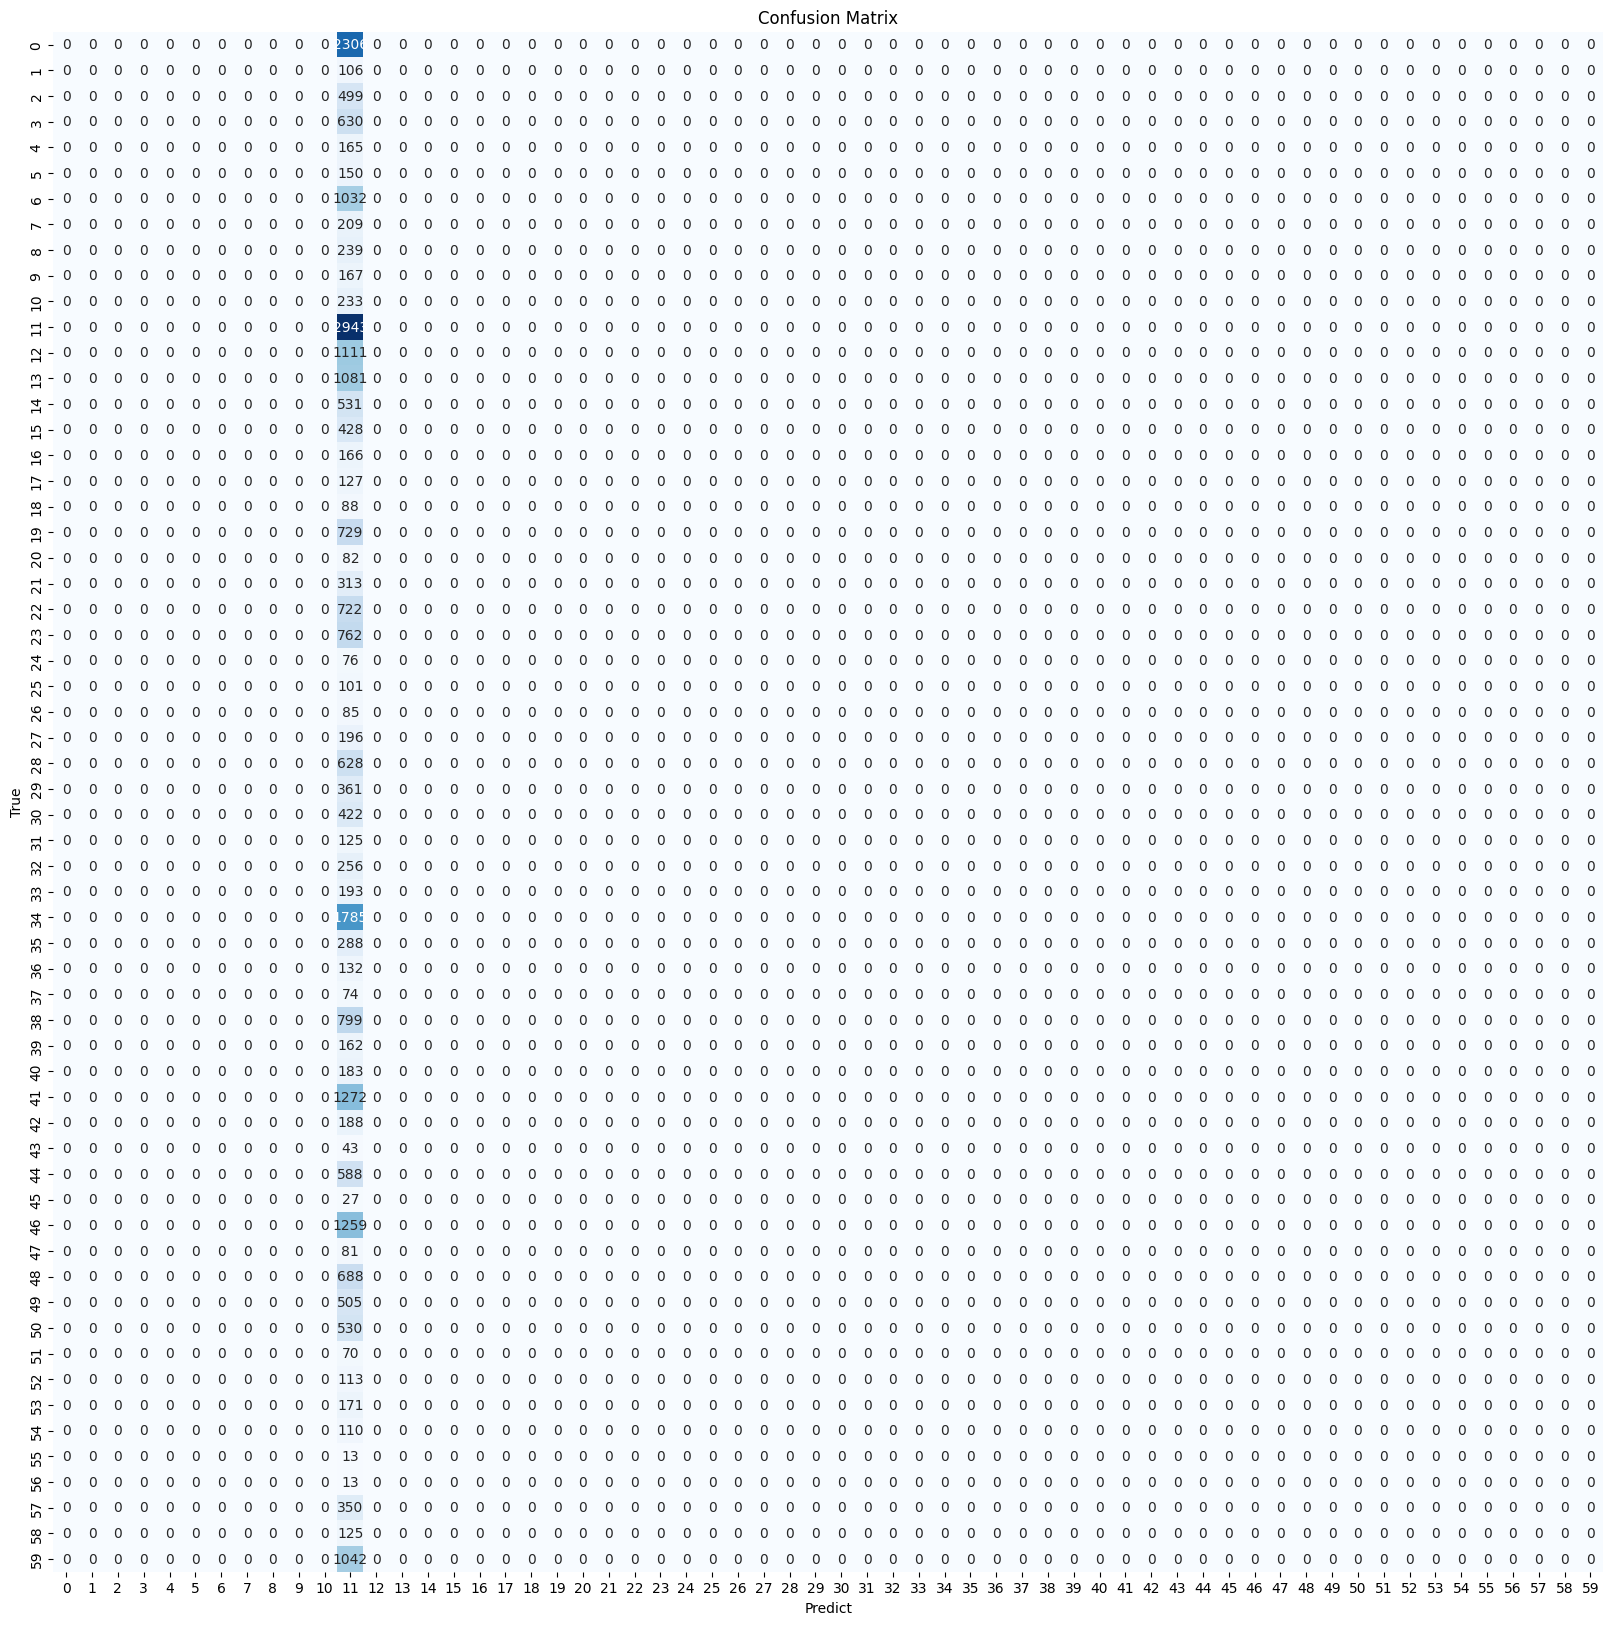

In [68]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

y_actual = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_actual, y_pred)

plt.figure(figsize=(20, 20))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predict')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# test_data = pd.DataFrame(x_test)
# y_test_data = pd.DataFrame(y_test)
# test_data.to_csv('/content/drive/MyDrive/DataSet/X_Testing_data.csv', index=False)

In [71]:
model.save('/content/drive/MyDrive/DataSet/Spatial_Ann Training.keras')